In [1]:
import matplotlib.pyplot as plt
import random as rnd

In [2]:
n = 10000

baraja48 = [1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12,
            1,2,3,4,5,6,7,8,9,10,11,12]

baraja52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13,
            1,2,3,4,5,6,7,8,9,10,11,12,13]

type(baraja48)

<class 'list'>

In [3]:
#escoger baraja
def baraja(x):
    if(x == 1):
        return baraja48.copy()
    elif(x == 2):
        return baraja52.copy()

In [4]:
def promedio(x):
    n = 0
    suma = 0
    for i in range(len(x)):
        if(x[i]>0):
            n += x[i]
    if(n != 0):
        for i in range(len(x)):
            suma += (i+1)*(x[i]/n)    
    return (suma)

In [5]:
#Una funcion para modularizar el codigo debido a que siempre se grafica lo mismo
def graficar(porcentajes,tarjetas_usadas,cartasXjuego):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle('Porcentajes')

    labels = "Victorias", "Derrotas"
    porcentajes = [victorias, derrotas]
    colors = ['lightcoral', 'lightskyblue']

    ax1.pie(porcentajes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    ax1.set_title("Porbabilidad de victoria")

    labels = ["1","2","3","4","5","6","7","8","9","10","11","12","13",]

    ax2.bar(labels,tarjetas_usadas)
    ax2.set_title("Frecuencia")
    ax2.set_xlabel("Carta")
    ax2.set_ylabel("Frecuencia")

    ax3.bar(labels,cartasXjuego)
    ax3.set_title("Promedio cartas")
    ax3.set_xlabel("Carta")
    ax3.set_ylabel("Frecuencia")
    fig.show()

    print ("Victorias:",porcentajes[0])
    print ("derrotas:",porcentajes[1])
    print("Probabilidad:",porcentajes[0]/n, "de ganar")
    print("El promedio de cartas usadas es:", promedioXcartas)
    print("Las tarjetas usadas fueron:", tarjetas_usadas)

# CODIGO PARA SOLUCIONAR EL PUNTO 1

Victorias: 1493
derrotas: 8507
Probabilidad: 0.1493 de ganar
El promedio de cartas usadas es: 3.1908908238446085
Las tarjetas usadas fueron: [439, 416, 409, 376, 357, 348, 366, 442, 386, 351, 340, 286, 248]


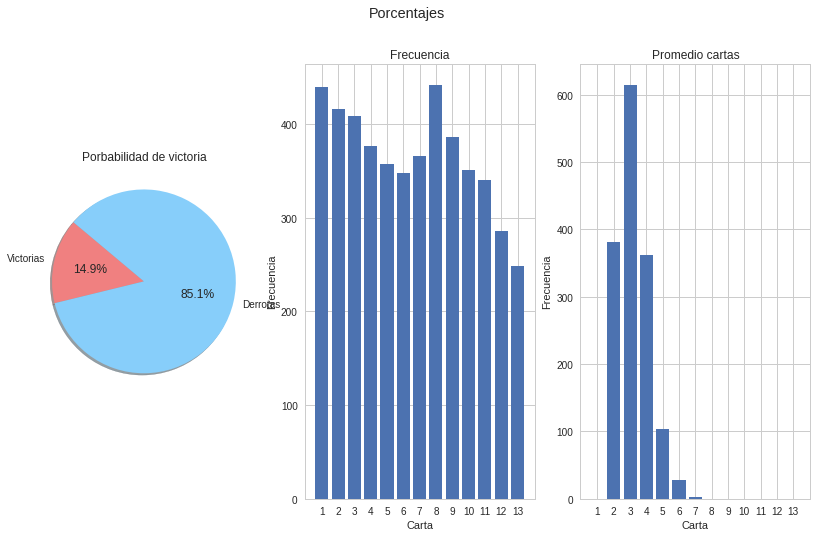

In [6]:
#Probabilidad de que se haga 21 con la baraja 52
baraja_escogida = baraja(2)
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

Victorias: 1540
derrotas: 8460
Probabilidad: 0.154 de ganar
El promedio de cartas usadas es: 3.351948051948052
Las tarjetas usadas fueron: [497, 465, 432, 479, 437, 407, 414, 365, 497, 433, 379, 357, 0]


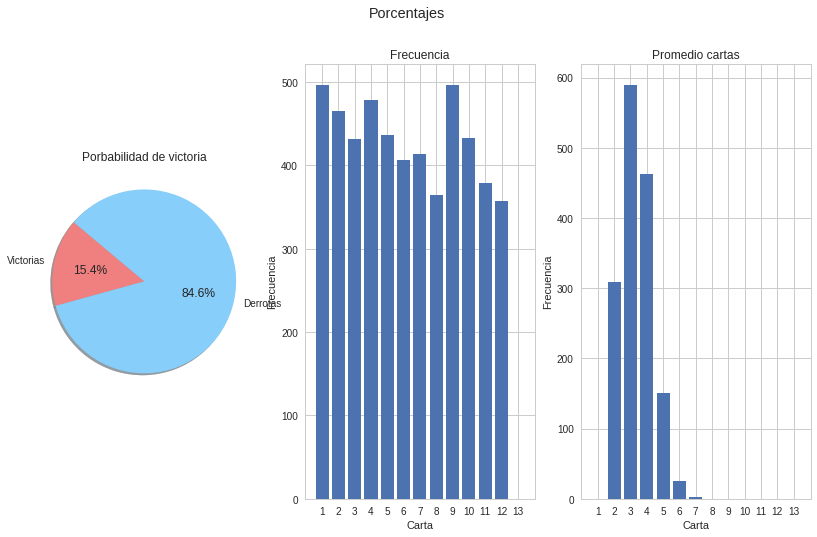

In [7]:
#Probabilidad de que se haga 21 con la baraja 48
baraja_escogida = baraja(1)
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

# CODIGO PARA SOLUCIONAR EL PUNTO 2

In [8]:
#se debe remplazar las cartas 11, 12 y 13 por 10 dejanlo la Baraja48 con 12 - 10's y Baraja52 con 16 - 10's
def remplazar10(x):
    
    while(x.count(11)>0):
        x.remove(11)
        x.append(10)
    
    while(x.count(12)>0):
        x.remove(12)
        x.append(10)
        
    while(x.count(13)>0):
        x.remove(13)
        x.append(10)
        
    return x

In [9]:
#añadir n barajas a la baraja original del mismo tipo
def anadir_Baraja(x,n):
    nueva_baraja = x.copy()
    for i in range(n):
        nueva_baraja.extend(x)
    return nueva_baraja

Victorias: 1380
derrotas: 8620
Probabilidad: 0.138 de ganar
El promedio de cartas usadas es: 3.5898550724637683
Las tarjetas usadas fueron: [596, 492, 444, 448, 392, 363, 344, 347, 326, 1202, 0, 0, 0]


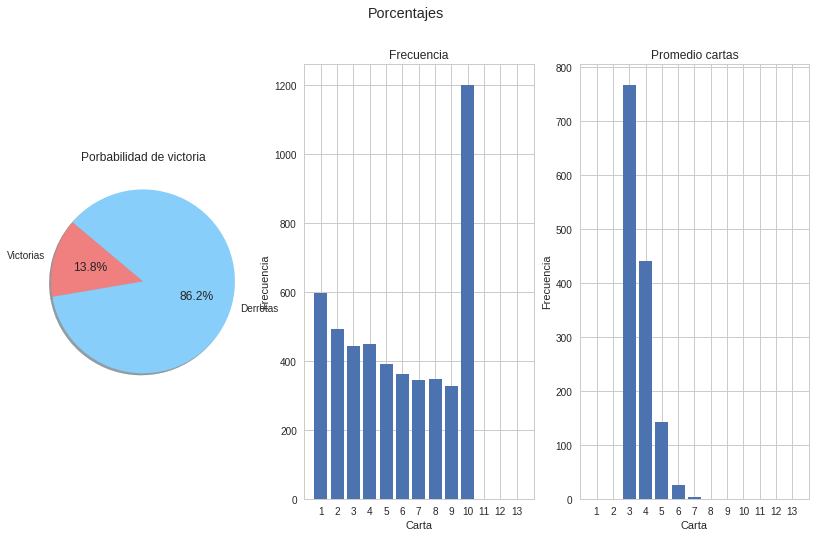

In [10]:
#Probabilidad de que se haga 21 con la baraja 52
baraja_escogida = baraja(2)
baraja_escogida = remplazar10(baraja_escogida)
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

Victorias: 1484
derrotas: 8516
Probabilidad: 0.1484 de ganar
El promedio de cartas usadas es: 3.691374663072776
Las tarjetas usadas fueron: [592, 565, 578, 482, 492, 481, 414, 410, 384, 1080, 0, 0, 0]


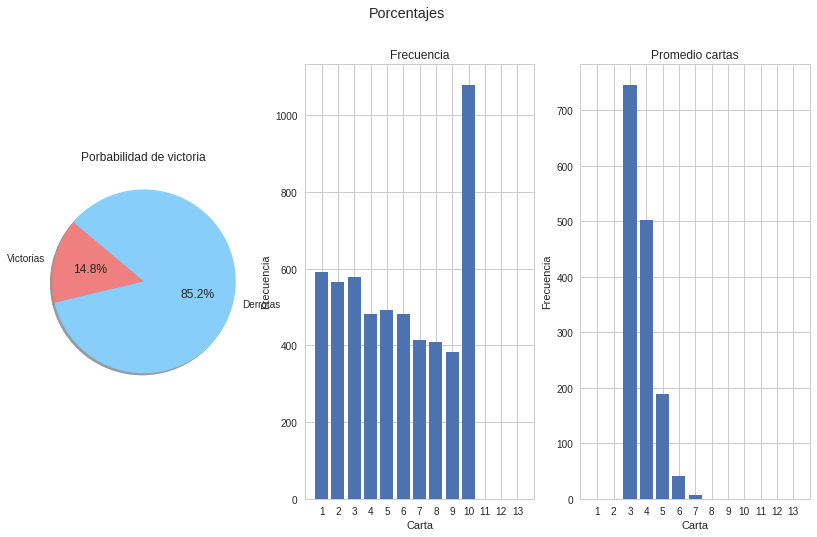

In [11]:
#Probabilidad de que se haga 21 con la baraja 48
baraja_escogida = baraja(1)
baraja_escogida = remplazar10(baraja_escogida)
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 0
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

Y es obvio el comportamiento nuevo de que 

# CODIGO PARA SOLUCIONAR EL PUNTO 3

In [12]:
#se usa una función para modularizar el codigo
def dividir_Baraja(x, y):
    n = int(len(x)/y)
    
    copy_cartas = x.copy()
    nueva_baraja = list()
    
    for i in range (n):
        carta = rnd.randint(1,len(copy_cartas)) - 1
        nueva_baraja.append(copy_cartas[carta])
        copy_cartas.pop(carta)

    return nueva_baraja

Victorias: 854
derrotas: 9146
Probabilidad: 0.0854 de ganar
El promedio de cartas usadas es: 1.0386416861826697
Las tarjetas usadas fueron: [66, 821, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
La baraja usada fue: [2, 6, 10, 6, 8, 10, 9, 7, 9, 10, 7, 4, 1, 10, 2, 3, 3, 10, 10, 3, 1, 10, 9, 10]
En la baraja habian: 2 - unos y 2 - dos


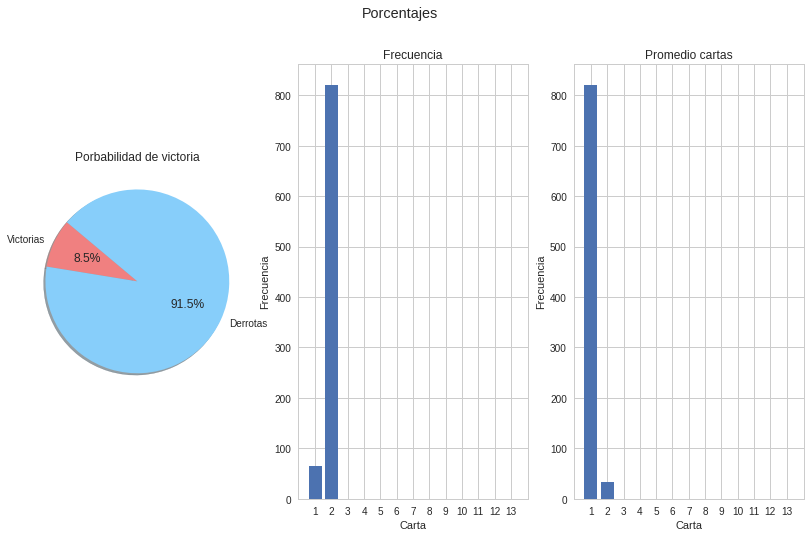

In [13]:
#Probabilidad de que se haga 21 con 19 y solo queda n/2 cartas  teniendo ya las cartas [7,7,5]
baraja_escogida = baraja(2)
baraja_escogida = remplazar10(baraja_escogida)

#removemos las cartas dichas para la copia de la baraja
baraja_escogida.remove(7)
baraja_escogida.remove(7)
baraja_escogida.remove(5)

victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]


#QUITAMOS las cartas y hacemos esta operación hasta que en la baraja hayan almenos dos - 1 y un - 2 :V
while(True):
    copy_Cartas = dividir_Baraja(baraja_escogida,2)
    if(copy_Cartas.count(1) > 1 and copy_Cartas.count(2) > 0):
        baraja_escogida = copy_Cartas
        break
        
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
        
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

print("La baraja usada fue:", baraja_escogida)
print("En la baraja habian:", baraja_escogida.count(1), "- unos y", baraja_escogida.count(2), "- dos")

Victorias: 1019
derrotas: 8981
Probabilidad: 0.1019 de ganar
El promedio de cartas usadas es: 1.112855740922473
Las tarjetas usadas fueron: [230, 904, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
La baraja usada fue: [2, 3, 7, 6, 10, 9, 2, 1, 8, 10, 10, 3, 6, 1, 7, 5, 1, 8, 5, 8, 10, 5]
En la baraja habian: 3 - unos y 2 - dos


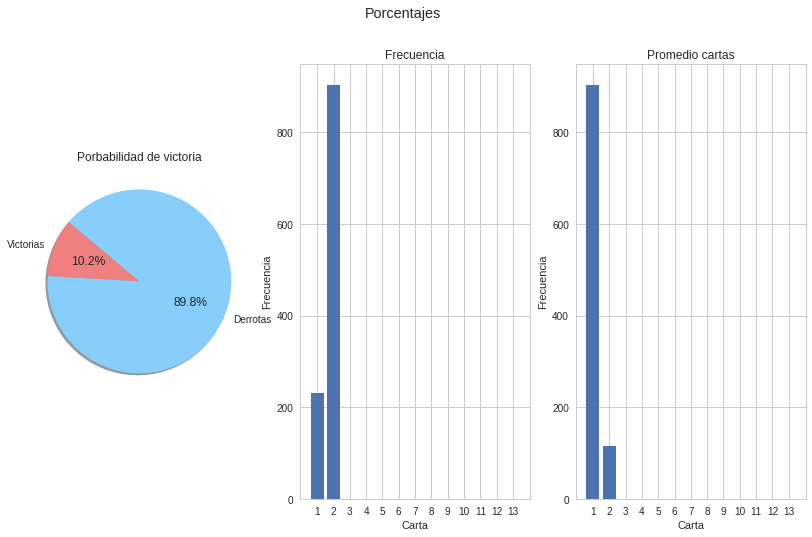

In [14]:
#Probabilidad de que se haga 21 con 19 y solo queda n/2 cartas  teniendo ya las cartas [7,7,5]
baraja_escogida = baraja(1)
baraja_escogida = remplazar10(baraja_escogida)

#removemos las cartas dichas para la copia de la baraja
baraja_escogida.remove(7)
baraja_escogida.remove(7)
baraja_escogida.remove(5)

victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]


#QUITAMOS las cartas y hacemos esta operación hasta que en la baraja hayan almenos dos - 1 y un - 2 :V
while(True):
    copy_Cartas = dividir_Baraja(baraja_escogida,2)
    if(copy_Cartas.count(1) > 1 and copy_Cartas.count(2) > 0):
        baraja_escogida = copy_Cartas
        break
        
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1
        
promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

print("La baraja usada fue:", baraja_escogida)
print("En la baraja habian:", baraja_escogida.count(1), "- unos y", baraja_escogida.count(2), "- dos")

## Explicación de análisis
Y tiene bastante sentido debido a que como se asegura que hayan almenos dos 1 y un 2 aparece la frecuencia de victorias, se abalanza más a 2, debido a que es mucho más probable ganar en la primer escogida con un 2 que tener dos tiradas escogido secuencialmente dos 1  

# CODIGO PARA SOLUCIONAR EL PUNTO 4

con el número de cartas de acuerdo con la lista a continuación (12 cartas tomaremos), con la probabilidad más alta (mazo caliente) y la más baja (mazo frío) de obtener 21 suponiendo que tiene un puntaje [7,7,5] calcular las probabilidades analiticamente.

si tenemos [7,7,5] es un total de 19 puntos es decir solo nos sirven los 1 y los 2 para ganar.

## La baraja más fria 
será aquella con la probabilidad más baja y será aquella donde para cada carta restante se cumple

"Para toda carta de i = 0 hasta n = 12 --> "carta(i) > 2""

y no es posible ganar por que todas las cartas restantes son mayores a 2 es decir 19 + cualquier carta(i) será mayor a 21 es decir 
PROBABILIDAD DE GANAR = 0

## La baraja más caliente 
Será aquella que como el caso contrario tendrá la mayor probabilidad de 1 y 2, pero las probabilidades de ganar son diferentes según el numero que saque por tanto se procede a los dos siguientes casos con la baraja armada de la siguiente forma:

Baraja = [1,1,1,1,2,2,2,2,x,x,x,x]

donde los 1 y 2 representan las cartas del mismo valor y "x" cualquier otra carta (que anteriormente explicado se concluye que se pierde directamente)

ahora sí los dos casos

### Sacar un 2 en la primer ronda
Al sacar un 2 se gana pues (19 + 2 = 21) esto quiere decir que la probabilidad de ganar al primer lanzamiento es 4/12 = 1/3 = 33.3%

### Sacar un 1 en la primer ronda
Al sacar un 1 el puntaje es (19 + 1 = 20) por lo que se puede seguir jugando y ahora con la unica condición para ganar que debe ser un 1 es decir 
primer ronda => 4/12 = 1/3 = 33.3%
segunda ronda => 3/11 = 27,3%

pero esto son probabilidades dependientes, por lo que se cumpla el estado de la segunda ronda debe ocurrir la primera, para cruzar estas probabilidades se multiplican 

4/12 * 3/11 = 9.1%

## Para finalizar
se sabe que sacar 1 o 2 en primer ronda es independiente así que se suman las probabilidades de ganar como si una no influyera en la otra 

33.3% + 9.1% = 42.4%, esa seria la probabilidad de ganar

### ahora lo vamos a comprobar en codigo y simulaciones

In [15]:
#primero creamos las barajas calientes y frias de manera arbitraria siguiendo las normas de la explicación
Caliente = [1,1,1,1,2,2,2,2,3,3,3,3]
Fria = [3,4,5,6,7,8,3,4,5,6,7,8]

Victorias: 0
derrotas: 10000
Probabilidad: 0.0 de ganar
El promedio de cartas usadas es: 0
Las tarjetas usadas fueron: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
La baraja usada fue: [3, 4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 8]
En la baraja habian: 0 - unos y 0 - dos


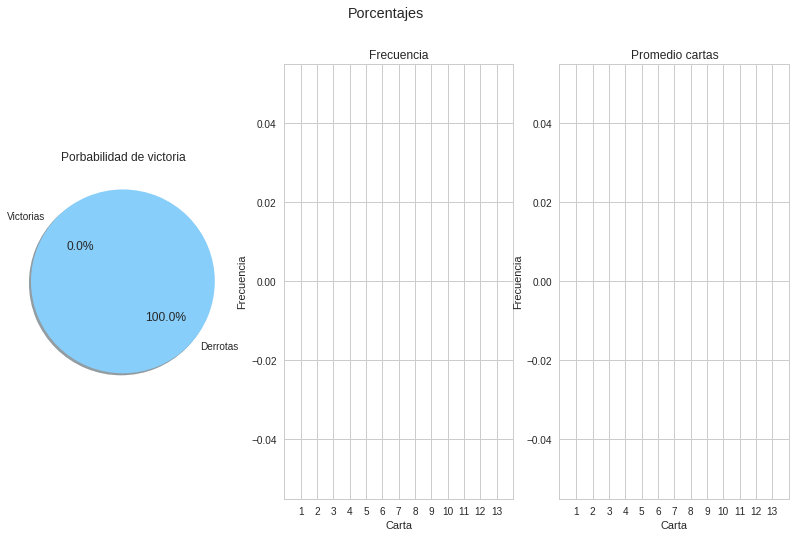

In [16]:
#Probabilidad de que se haga 21 con la baraja 52
baraja_escogida = Fria.copy()
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1

promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

print("La baraja usada fue:", baraja_escogida)
print("En la baraja habian:", baraja_escogida.count(1), "- unos y", baraja_escogida.count(2), "- dos")

Victorias: 4197
derrotas: 5803
Probabilidad: 0.4197 de ganar
El promedio de cartas usadas es: 1.2194424588992137
Las tarjetas usadas fueron: [1842, 3276, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
La baraja usada fue: [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
En la baraja habian: 4 - unos y 4 - dos


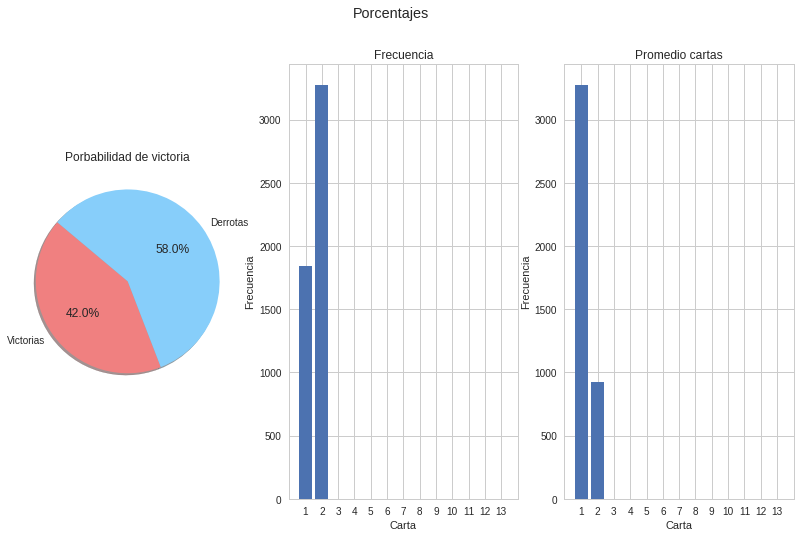

In [17]:
#Probabilidad de que se haga 21 con la baraja 52
baraja_escogida = Caliente.copy()
victorias = 0
derrotas = 0
tarjetas_usadas = [0,0,0,0,0,0,0,0,0,0,0,0,0]
cartasXjuego = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range (n):
    copy_Cartas = baraja_escogida.copy()
    puntaje = 19
    tarjetas_que_hacen21 = list()
    while(puntaje < 21):
        carta = rnd.randint(1,len(copy_Cartas)) - 1
        puntaje += copy_Cartas[carta]
        tarjetas_que_hacen21.append(copy_Cartas[carta])
        #print("la Carta es", copy_Cartas[carta], "el puntaje actual es", puntaje)
        copy_Cartas.pop(carta)
    if(puntaje == 21):
        victorias += 1
        cartasXjuego[(len(tarjetas_que_hacen21))-1] += 1
        while(len(tarjetas_que_hacen21) > 0):
            tarjetas_usadas[tarjetas_que_hacen21[0]-1] += 1
            tarjetas_que_hacen21.pop(0)
    else:
        derrotas += 1

promedioXcartas = promedio(cartasXjuego)
porcentajes = [victorias, derrotas]
graficar(porcentajes=porcentajes,tarjetas_usadas=tarjetas_usadas, cartasXjuego=cartasXjuego)

print("La baraja usada fue:", baraja_escogida)
print("En la baraja habian:", baraja_escogida.count(1), "- unos y", baraja_escogida.count(2), "- dos")

Puntos solucionados 

1✓
2✓
3✓
4✓
5

CODIGO PARA SOLUCIONAR EL PUNTO 4